In [49]:
import numpy as np
import pystan
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
s = np.array([
    [0,0], 
    [0,10], 
    [10,0], 
    [10,10]
])
t = np.random.normal(0, 10, size=(1,2))

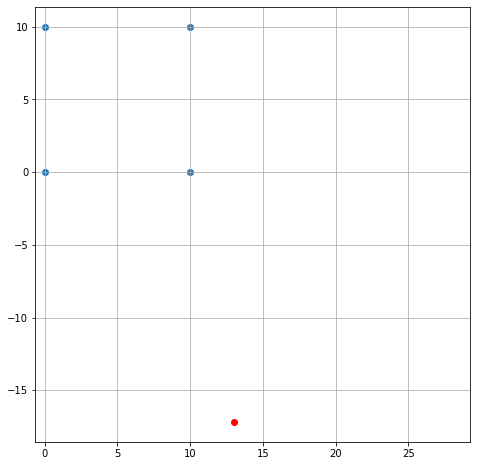

In [171]:
plt.figure(figsize=(8,8))

plt.scatter(s[:,0], s[:,1])
plt.scatter(t[:,0], t[:,1], c='red')

plt.axis('square')
plt.grid()
plt.show()

In [176]:
d_true = np.sqrt(np.sum(np.square(s - t), axis=1))

sigma = 1
noise = np.random.normal(0, sigma, size=len(d_true))

d = d_true + noise

In [177]:
# model = pystan.StanModel('location.stan')

In [178]:
data = {'K': s.shape[0], 's': s, 'd': d}

trace = model.sampling(data=data, iter=10000)
trace_df = trace.to_dataframe()

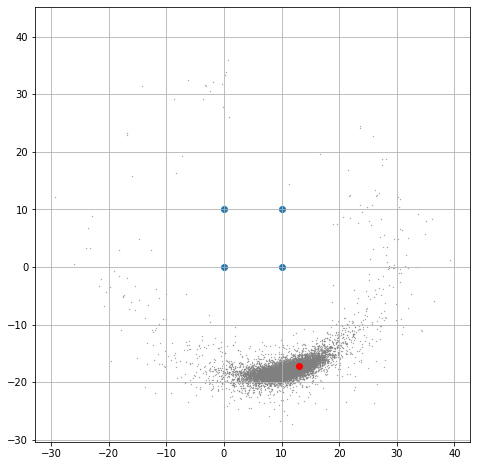

In [179]:
plt.figure(figsize=(8,8))

# sns.kdeplot(x = trace_df['t[1]'], y = trace_df['t[2]'], shade='blue')
plt.scatter(trace_df['t[1]'], trace_df['t[2]'], s=.1, c='gray')
plt.scatter(s[:,0], s[:,1])
plt.scatter(t[:,0], t[:,1], c='red')

plt.axis('square')
plt.grid()
plt.show()